# Project: Concrete compressive strength

## Conclusion: XGBoost regression gave best R square score of 92%, random forest - 90%

Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

### Abstract:

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

### Source:

Original Owner and Donor
Prof. I-Cheng Yeh
Department of Information Management
Chung-Hua University,
Hsin Chu, Taiwan 30067, R.O.C.
e-mail:icyeh '@' chu.edu.tw
TEL:886-3-5186511

Date Donated: August 3, 2007


### Data Set Information:

Number of instances 1030
Number of Attributes 9
Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values None


### Attribute Information:

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable



### Relevant Papers:

Main
1. I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

Others
2. I-Cheng Yeh, "Modeling Concrete Strength with Augment-Neuron Networks," J. of Materials in Civil Engineering, ASCE, Vol. 10, No. 4, pp. 263-268 (1998).
3. I-Cheng Yeh, "Design of High Performance Concrete Mixture Using Neural Networks," J. of Computing in Civil Engineering, ASCE, Vol. 13, No. 1, pp. 36-42 (1999).
4. I-Cheng Yeh, "Prediction of Strength of Fly Ash and Slag Concrete By The Use of Artificial Neural Networks," Journal of the Chinese Institute of Civil and Hydraulic Engineering, Vol. 15, No. 4, pp. 659-663 (2003).
5. I-Cheng Yeh, "A mix Proportioning Methodology for Fly Ash and Slag Concrete Using Artificial Neural Networks," Chung Hua Journal of Science and Engineering, Vol. 1, No. 1, pp. 77-84 (2003).
6. Yeh, I-Cheng, "Analysis of strength of concrete using design of experiments and neural networks," Journal of Materials in Civil Engineering, ASCE, Vol.18, No.4, pp.597-604 (2006).



### Citation Request:

NOTE: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

# STEP 1: Learning the dataset and feature engineering

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # for Q-Q plots

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df = pd.read_excel('Concrete_Data.xls')

### Learning the dataset and making feature engineering

In [3]:
# showing first five rows of the dateset
# df.head()

In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
# replacing columns' names with shorter 
df.columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']

In [6]:
# showing first five rows of the dateset
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
# showing statistical information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
# showing statistical data of the dataset
# df.describe()

In [9]:
# checking missing values
df.isnull().any(axis = 1).sum()

0

In [10]:
# checking duplicated rows
df.duplicated().sum()

25

In [11]:
# deleting the duplicated rows
df.drop_duplicates(inplace=True)

In [12]:
# checking duplicated rows
df.duplicated().sum()

0

In [13]:
# separating dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Strength'], axis=1),  # drop the target
    df['Strength'],  # just the target
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((703, 8), (302, 8))

### Exploring the dataset

Visualizing data columns

Exploring distribution, skewness, outliers and other statistical properties

Looking at the distributions of the variables to see which imputation to use

In [14]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(data_frame, variable):
    # function takes a dataframe (data_frame) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data_frame[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(data_frame[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data_frame[variable])
    plt.title('Boxplot')

    plt.show()

In [15]:
# a function for plotting a str column of df and testing for normality

def draw_and_test(data_frame, str):
    # plotting variable
    diagnostic_plots(data_frame, str)

    # testing for normality
    print(str)
    skewness = data_frame[str].skew()
    print('Skewness is {:.2f}'.format(skewness))
    kurtosis = data_frame[str].kurtosis()
    print('Kurtosis is {:.2f}'.format(kurtosis))

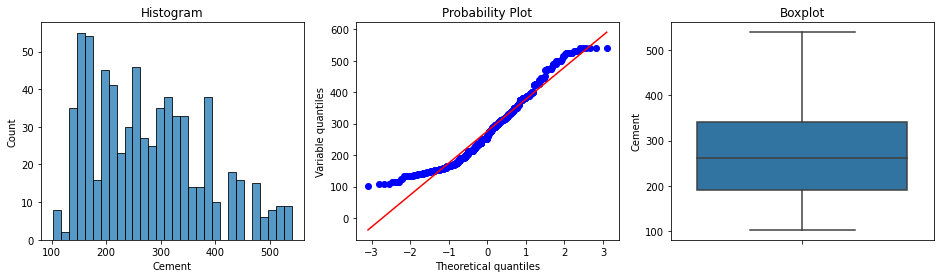

Cement
Skewness is 0.57
Kurtosis is -0.44


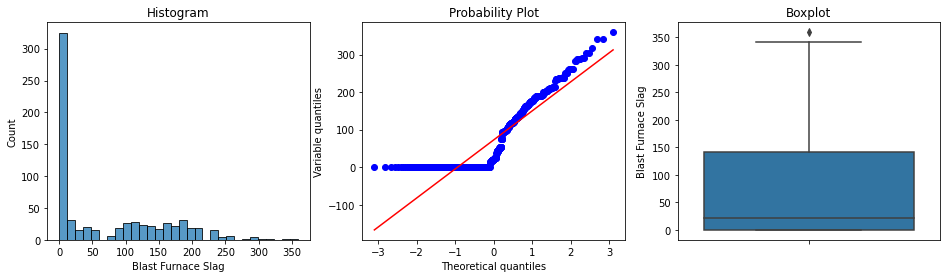

Blast Furnace Slag
Skewness is 0.83
Kurtosis is -0.46


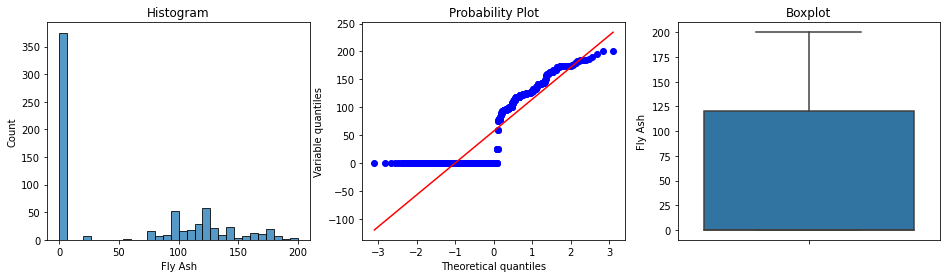

Fly Ash
Skewness is 0.45
Kurtosis is -1.43


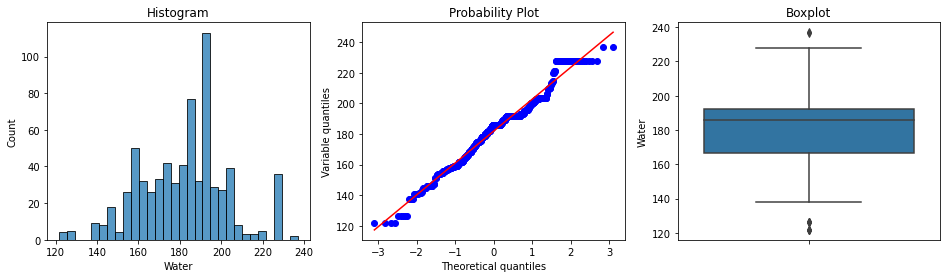

Water
Skewness is -0.02
Kurtosis is 0.19


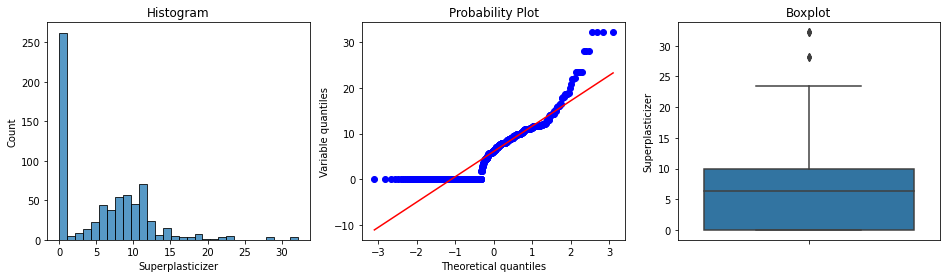

Superplasticizer
Skewness is 0.99
Kurtosis is 1.72


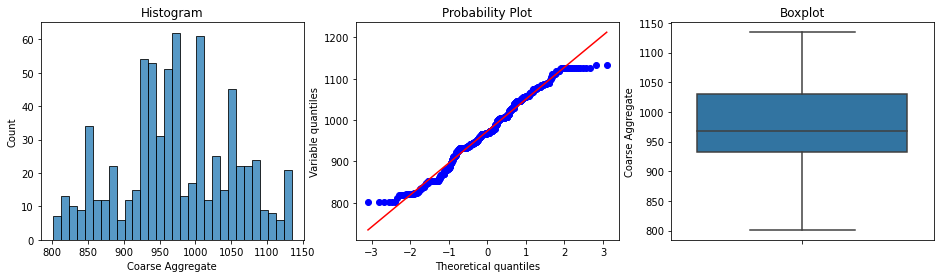

Coarse Aggregate
Skewness is -0.08
Kurtosis is -0.59


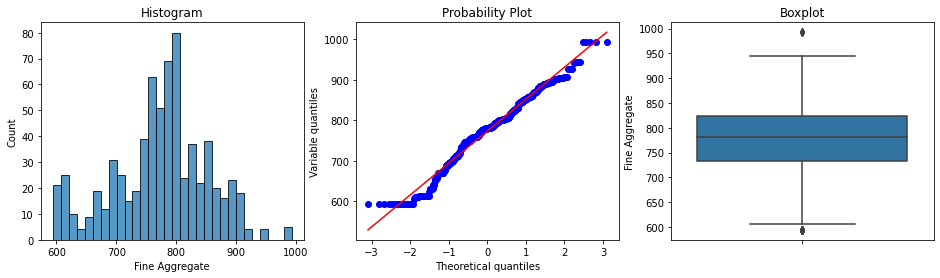

Fine Aggregate
Skewness is -0.28
Kurtosis is -0.02


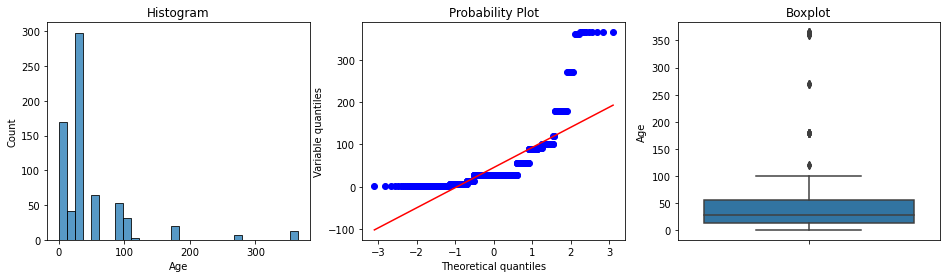

Age
Skewness is 3.31
Kurtosis is 12.75


In [16]:
# plotting all the X_train variables
for column in X_train.columns[:]:
    draw_and_test(X_train, column)

Discussion: besides 'age', all the variables are well-distributed. No constant or pseudo-constant features. Age's skewness is high.

In [17]:
# trying log transformation to improve the skewness
log_Age_skewness = np.log(X_train["Age"]).skew()
log_Age_skewness

-0.18550578054596004

Replacing Age variable with sqrt(Age) to fix the skewness

In [18]:
# creating log(Age) column
X_train["log(Age)"] = np.log(X_train['Age'])
X_test["log(Age)"] = np.log(X_test['Age'])

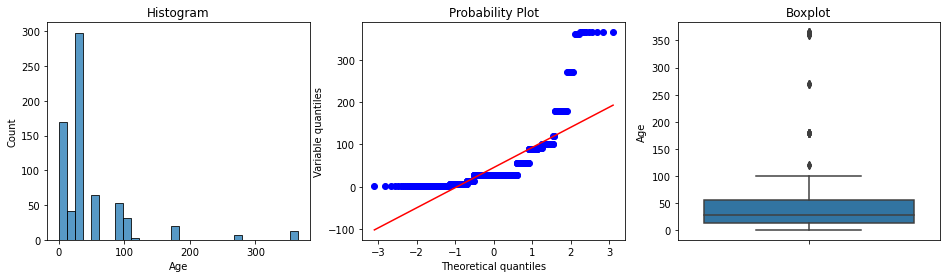

Age
Skewness is 3.31
Kurtosis is 12.75


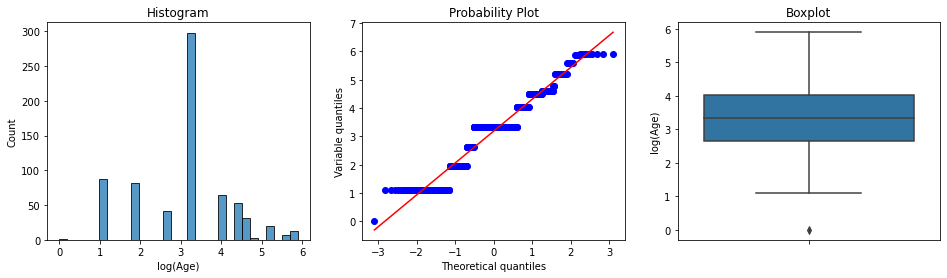

log(Age)
Skewness is -0.19
Kurtosis is -0.28


In [19]:
# plotting all the variables
for column in X_train.columns[-2:]:
    draw_and_test(X_train, column)

In [20]:
# deleting Age column
X_train.drop(columns=["Age"], inplace=True)
X_test.drop(columns=["Age"], inplace=True)

In [21]:
# showing first five rows of the dateset
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,log(Age)
567,203.50,135.7,0.00,185.70,0.00,1076.2,759.3,1.945910
466,190.34,0.0,125.18,166.61,9.88,1079.0,798.9,4.605170
845,321.00,164.0,0.00,190.00,5.00,870.0,774.0,3.332205
422,167.35,129.9,128.62,175.46,7.79,1006.3,746.6,2.639057
984,154.80,0.0,142.80,193.30,9.10,877.2,867.7,3.332205


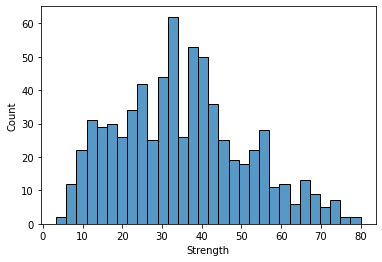

In [22]:
# plotting the y_train variable
sns.histplot(y_train, bins=30);

In [23]:
# calculating a correlation matrix
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
#print(corr_matrix)

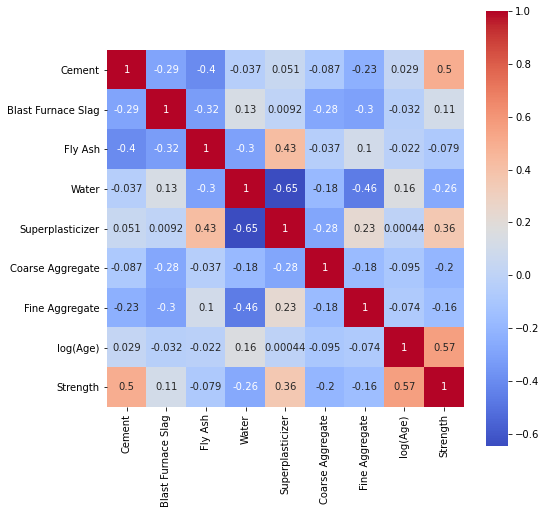

In [24]:
# drawing a heatmap
plt.figure(figsize = (8, 8))
ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm')
plt.show()

### Discussion:

There is no strongly inter-correlated features. Water and Superplasticizer are 65% correleted.

Features Cement, Watet, Superplasticizer and log(Age) are more than 30% correlated with the target.

# STEP 2: Choosing best performing regression model

### Random forest regression

In [25]:
# training the random forest regression model on the Training set

reg_rf = RandomForestRegressor(random_state = 42)
reg_rf.fit(X_train, y_train)

# predicting the Test set results

y_pred = reg_rf.predict(X_test)
r2_score(y_test, y_pred)

0.8986992262897979

### XGBoost regression

In [26]:
# training the XGBoost regression model on the Training set

reg_xgb = XGBRegressor(random_state = 42)
reg_xgb.fit(X_train, y_train)

# predicting the Test set results

y_pred = reg_xgb.predict(X_test)
r2_score(y_test, y_pred)

0.9236124944361332

## Conclusion: XGBoost regression gave best R square score of 92%, random forest - 90%